### Analisando as Vendas

In [1]:
import pandas as pd

In [2]:
alucar = pd.read_csv('alucar.csv')

In [3]:
alucar.shape

(24, 2)

In [4]:
#Quantos Dados tem no total, seja na coluna mes ou coluna vendas
alucar.isna().sum().sum()

0

In [5]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [6]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [7]:
! pip install seaborn==0.9.0
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
print(sns.__version__)

0.9.0


<AxesSubplot:xlabel='mes', ylabel='vendas'>

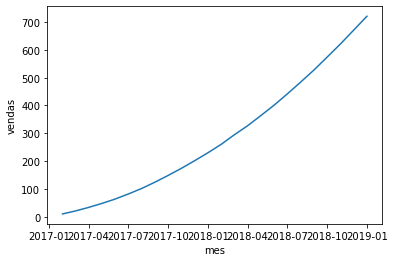

In [9]:
sns.lineplot(x='mes',y='vendas',data=alucar)

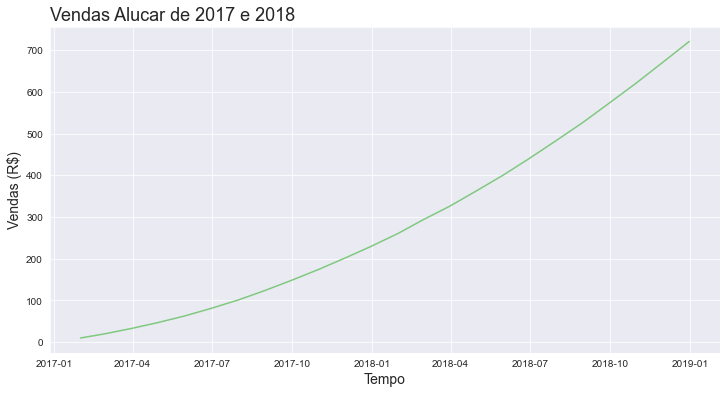

In [10]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes',y='vendas',data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018',loc='left',fontsize = 18)
ax.set_xlabel('Tempo',fontsize=14)
ax.set_ylabel('Vendas (R$)',fontsize=14)
ax = ax

### Decomposição de Vendas

In [11]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [12]:
def plotar(titulo,labelx,labely,x,y,dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x,y=y,data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo,loc='left',fontsize = 18)
    ax.set_xlabel(labelx,fontsize=14)
    ax.set_ylabel(labely,fontsize=14)
    ax = ax

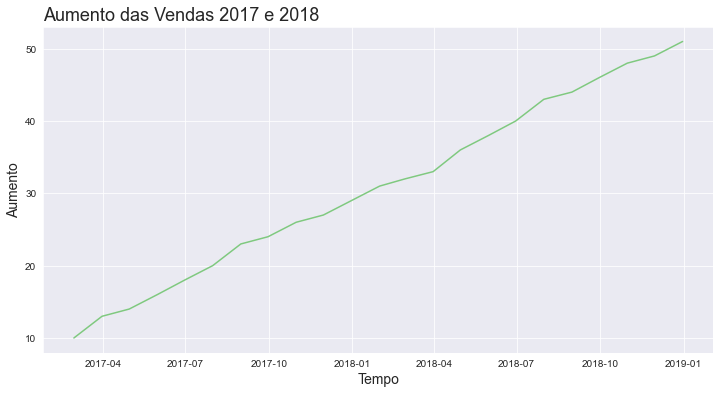

In [13]:
plotar('Aumento das Vendas 2017 e 2018','Tempo','Aumento','mes','aumento',alucar)

In [14]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


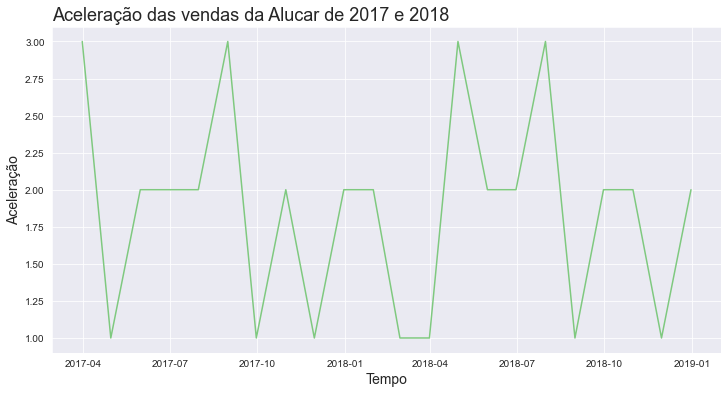

In [15]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018','Tempo','Aceleração','mes','aceleracao',alucar)

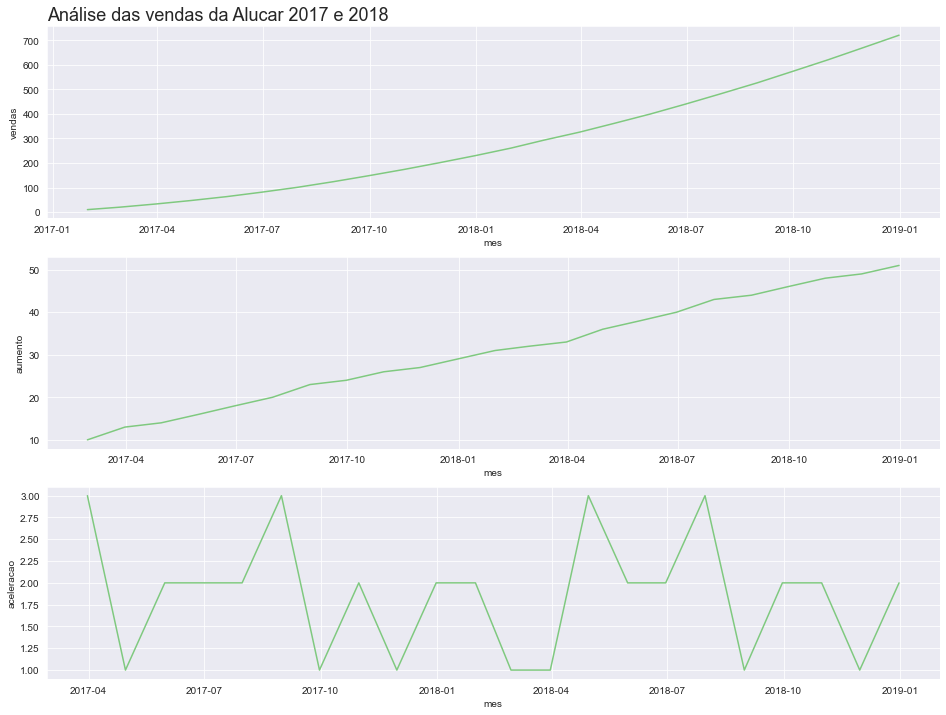

In [16]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise das vendas da Alucar 2017 e 2018',fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax

In [17]:
def plot_comparacao(x,y1,y2,y3,dataset,titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax



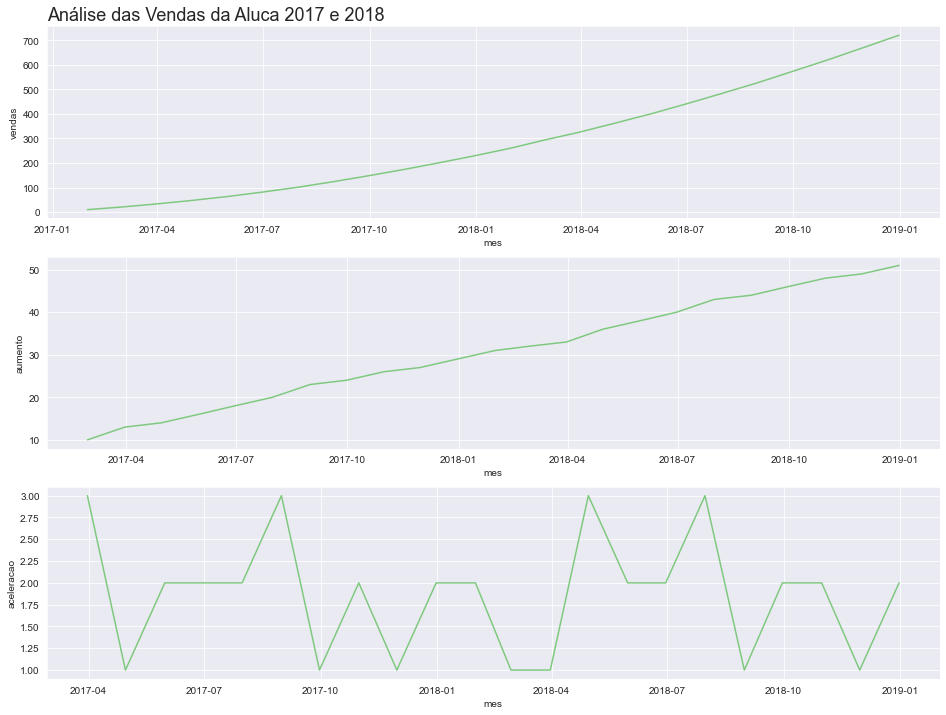

In [18]:
plot_comparacao('mes','vendas','aumento','aceleracao',alucar,'Análise das Vendas da Aluca 2017 e 2018')

### Autocorrelação

In [19]:
from pandas.plotting import autocorrelation_plot

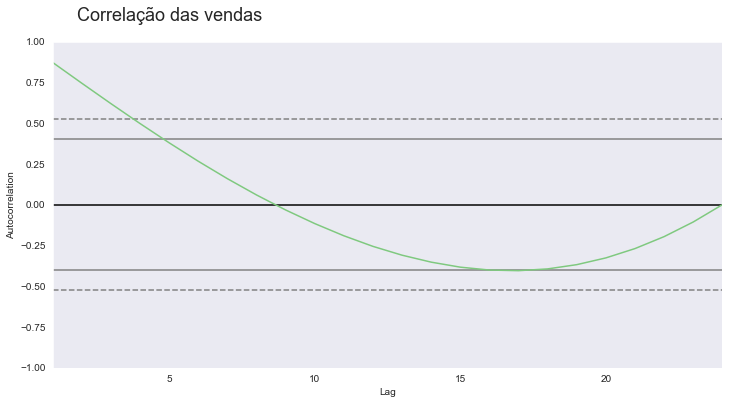

In [20]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas',fontsize=18,x=0.26,y=0.96)
autocorrelation_plot(alucar['vendas'])
ax=ax

Percebemos que os primeiros 7 dias do mês possuem correlação alta, mas depois não.

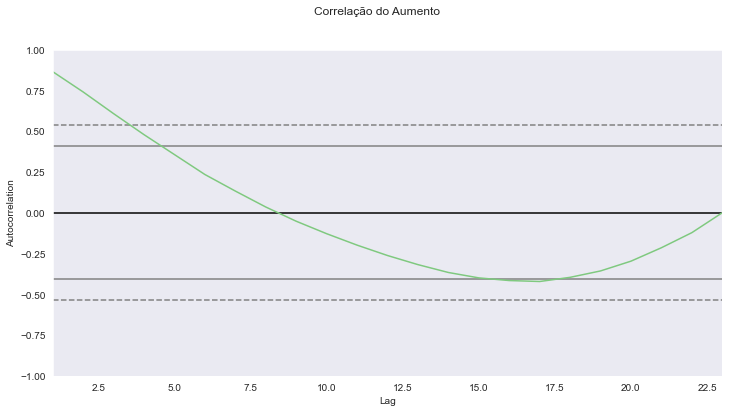

In [21]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento')
autocorrelation_plot(alucar['aumento'][1:])
#esse [1:] foi porque o primeiro indice é nulo ai dava erro no grafico, assim consideramos a analise a partir da seg linha
ax=ax

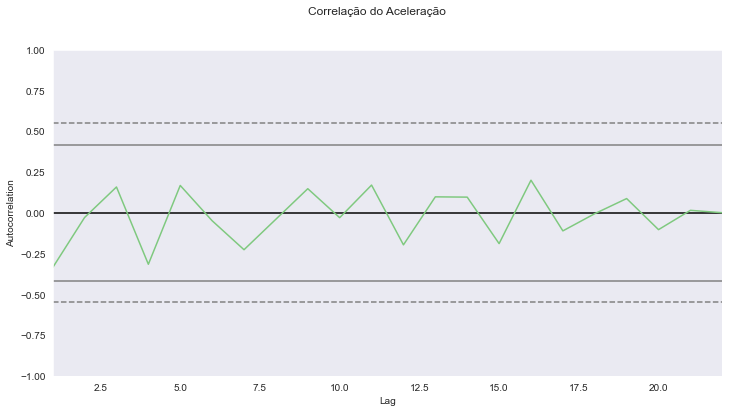

In [22]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aceleração')
autocorrelation_plot(alucar['aceleracao'][2:])
ax=ax

### Alucar - Analisando assinantes da newsletter

In [23]:
assinantes = pd.read_csv('newsletter_alucar.csv')

In [24]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [25]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


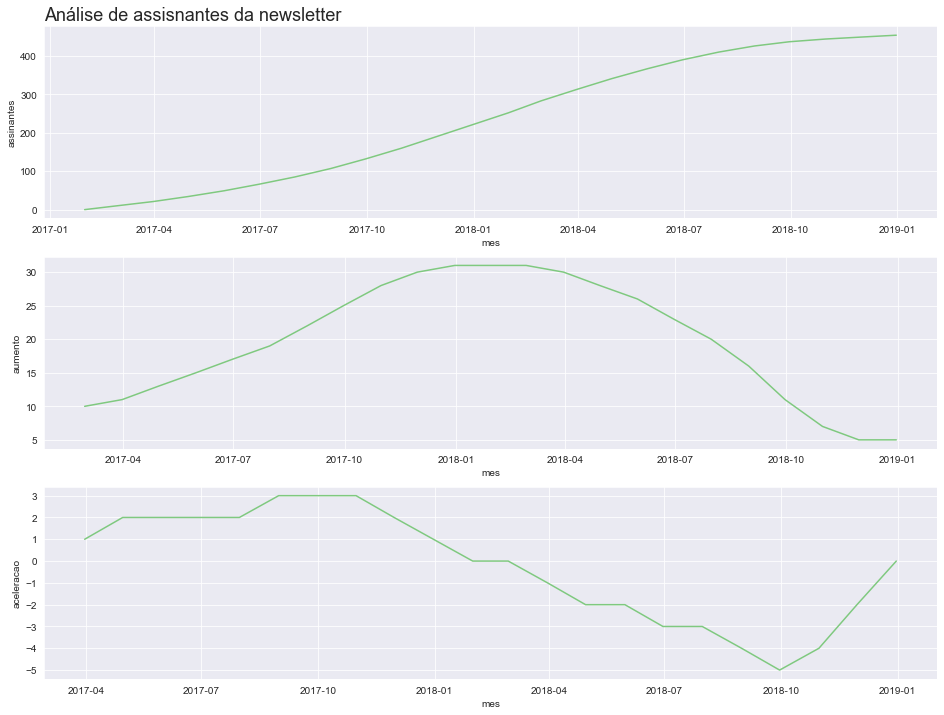

In [26]:
plot_comparacao('mes','assinantes','aumento','aceleracao',assinantes,'Análise de assisnantes da newsletter')

## Chocolura

### Analisando as Vendas

In [27]:
chocolura = pd.read_csv('chocolura.csv')

In [28]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [29]:
chocolura.isna().sum().sum()

0

In [30]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()

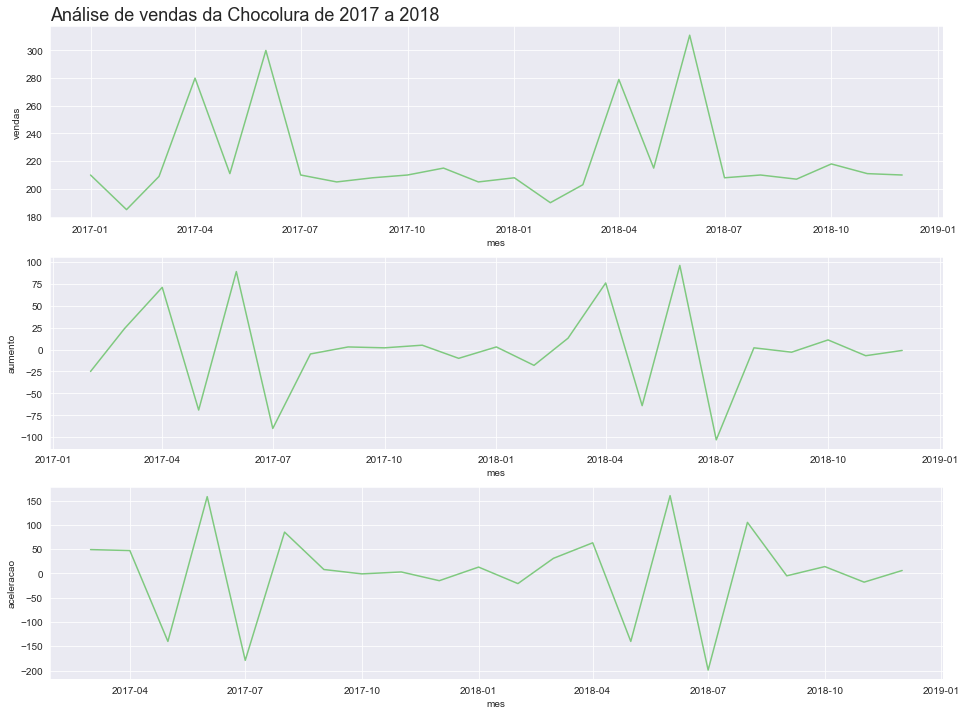

In [31]:
plot_comparacao('mes','vendas','aumento','aceleracao',chocolura,'Análise de vendas da Chocolura de 2017 a 2018')

#### Chocolura - Vendas Diárias (Outubro e Novembro) 

In [32]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')

In [33]:
print('Quantidade de linhas e colunas:',vendas_por_dia.shape)
print('Quantidade de dados nulos:',vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [34]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [35]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()

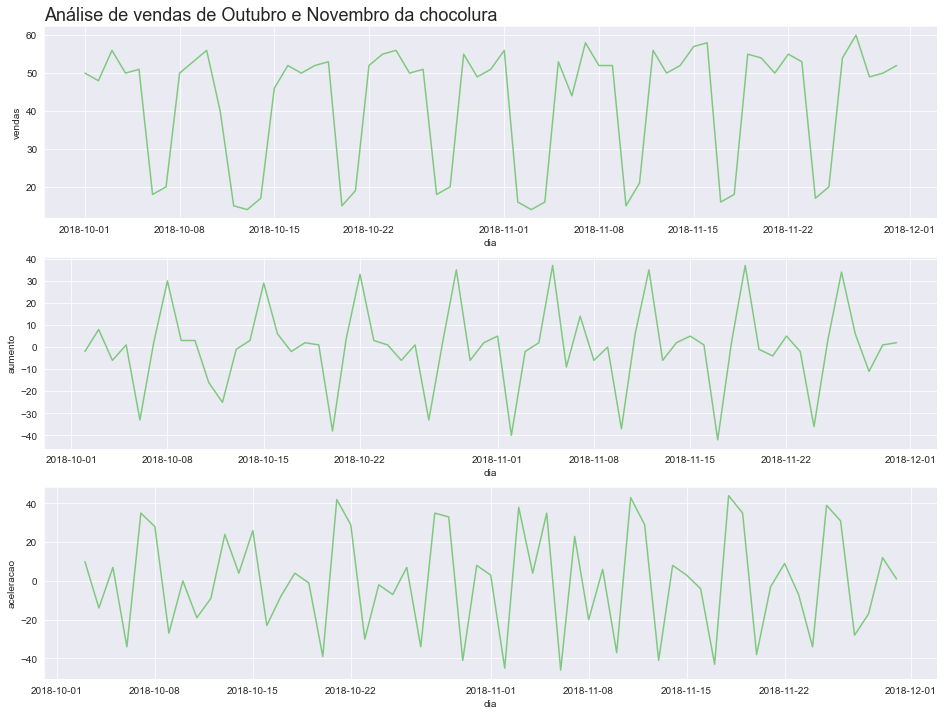

In [36]:
plot_comparacao('dia','vendas','aumento','aceleracao',vendas_por_dia,'Análise de vendas de Outubro e Novembro da chocolura')

#### Analisando a Sazonalidade

In [37]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [38]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [39]:
dias_traduzidos = {'Monday':'Segunda', 'Tuesday':'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado','Sunday':'Domingo'}
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


#### Agrupando os dias

In [40]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()

C:\Users\artur\AppData\Local\Temp\ipykernel_5236\3797905394.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()


In [41]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


#### Correlação das Vendas Diárias

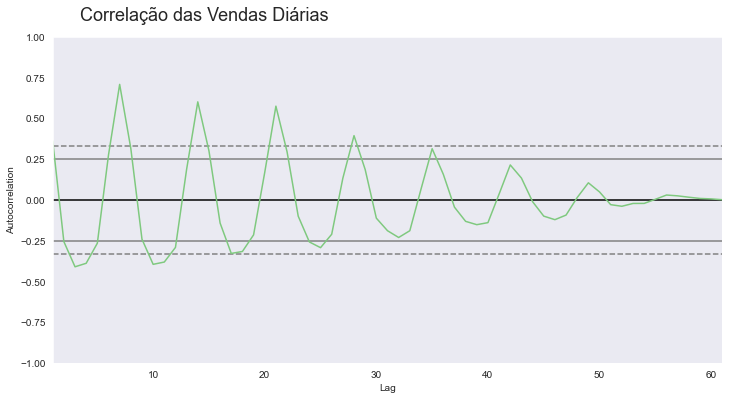

In [42]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas Diárias',fontsize=18,x=0.3,y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax=ax

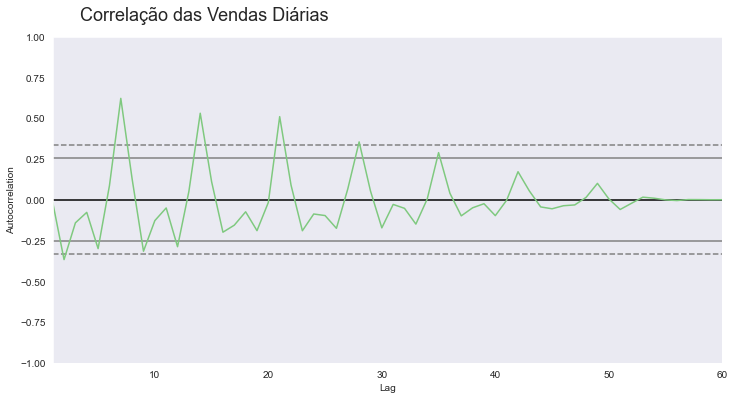

In [43]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento das Vendas Diárias',fontsize=18,x=0.3,y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax=ax

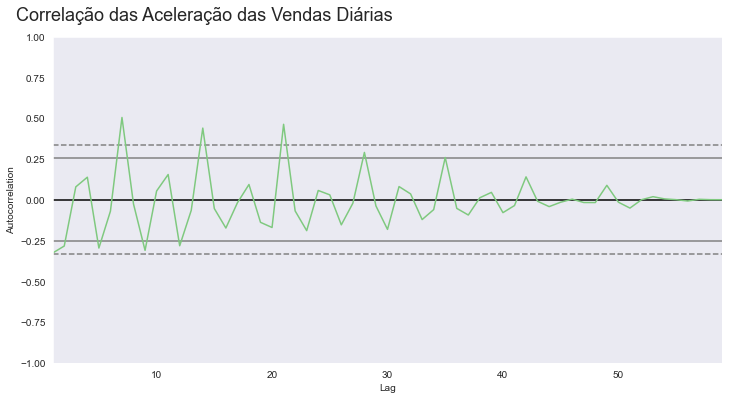

In [44]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Aceleração das Vendas Diárias',fontsize=18,x=0.3,y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax=ax

#### Cafelura - Análise de Vendas

In [45]:
cafelura=pd.read_csv('cafelura.csv')

In [46]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [47]:
print('Quantidade de linhas e colunas:',cafelura.shape)
print('Quantidade de dados nulos:',cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


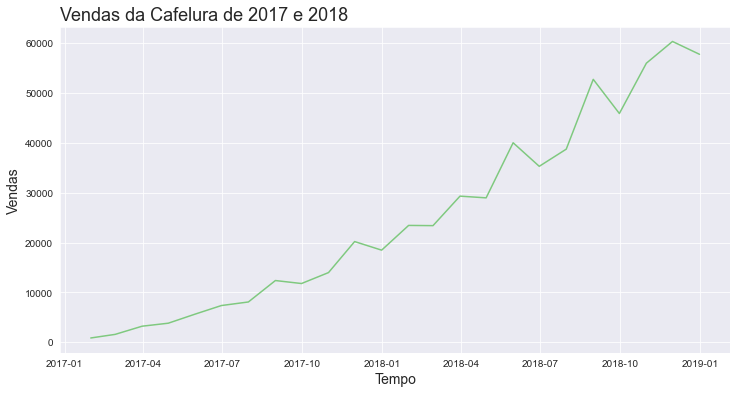

In [48]:
plotar('Vendas da Cafelura de 2017 e 2018','Tempo','Vendas','mes','vendas',cafelura) 

In [49]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')

In [50]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [51]:
cafelura['vendas_normalizadas'] = cafelura['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias'].values

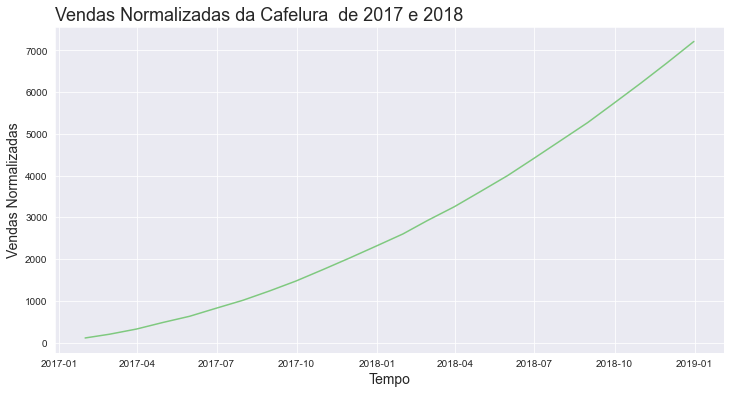

In [52]:
plotar('Vendas Normalizadas da Cafelura  de 2017 e 2018','Tempo','Vendas Normalizadas','mes','vendas_normalizadas',cafelura)

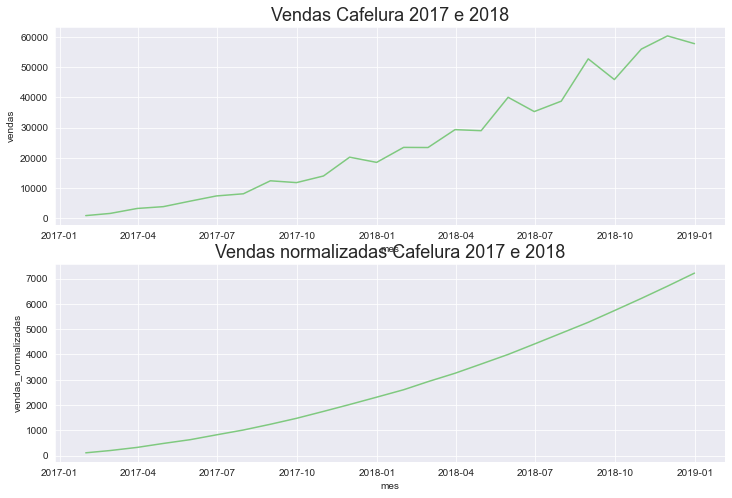

In [53]:
plt.figure(figsize=(12,8))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax 

### Statsmodels

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

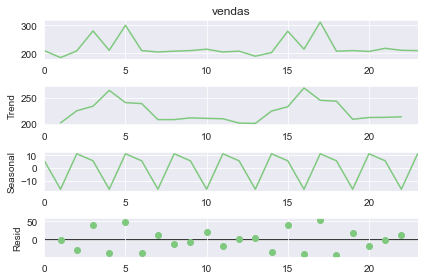

In [60]:
resultado = seasonal_decompose(chocolura['vendas'],  period=3)
ax = resultado.plot()

In [61]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [62]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


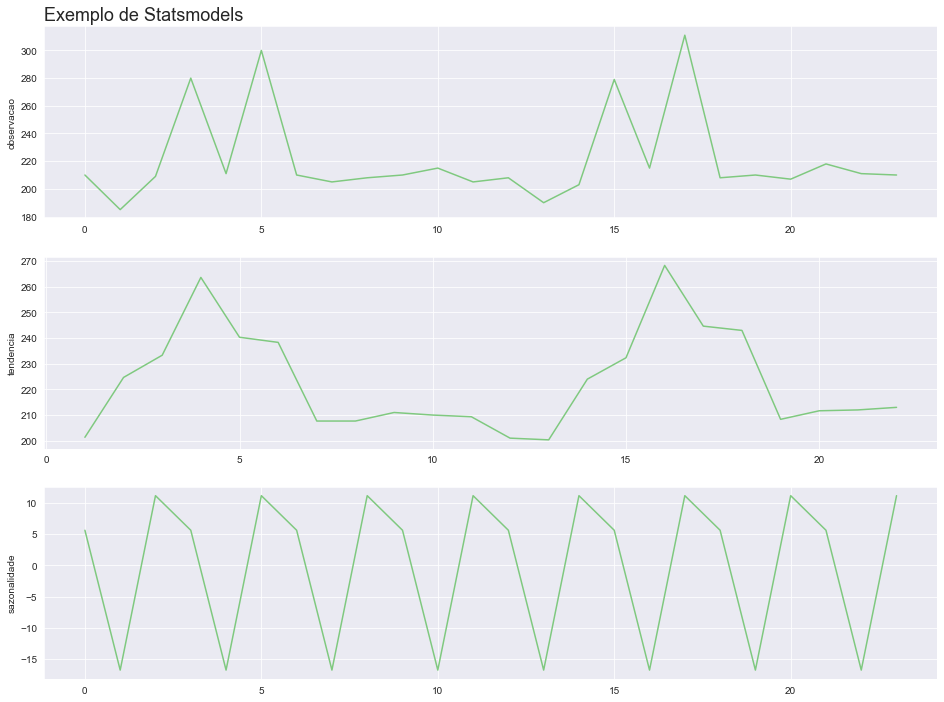

In [63]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

#### Métodos para tratar dados nulos:
https://colab.research.google.com/drive/1UZFN5Jke6gFgYLNMbsU7eBJ9Pk9TdpIm#scrollTo=B6ej--JE_jv0